In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2, RFE, SelectFromModel
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('sample_data/bank-full.csv', sep=';')
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())
print("\nClass distribution (target variable 'y'):")
print(df['y'].value_counts())
print("\nPercentage distribution:")
print(df['y'].value_counts(normalize=True) * 100)

Dataset shape: (45211, 17)

First few rows:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45

Summary statistics for numerical features:
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000 

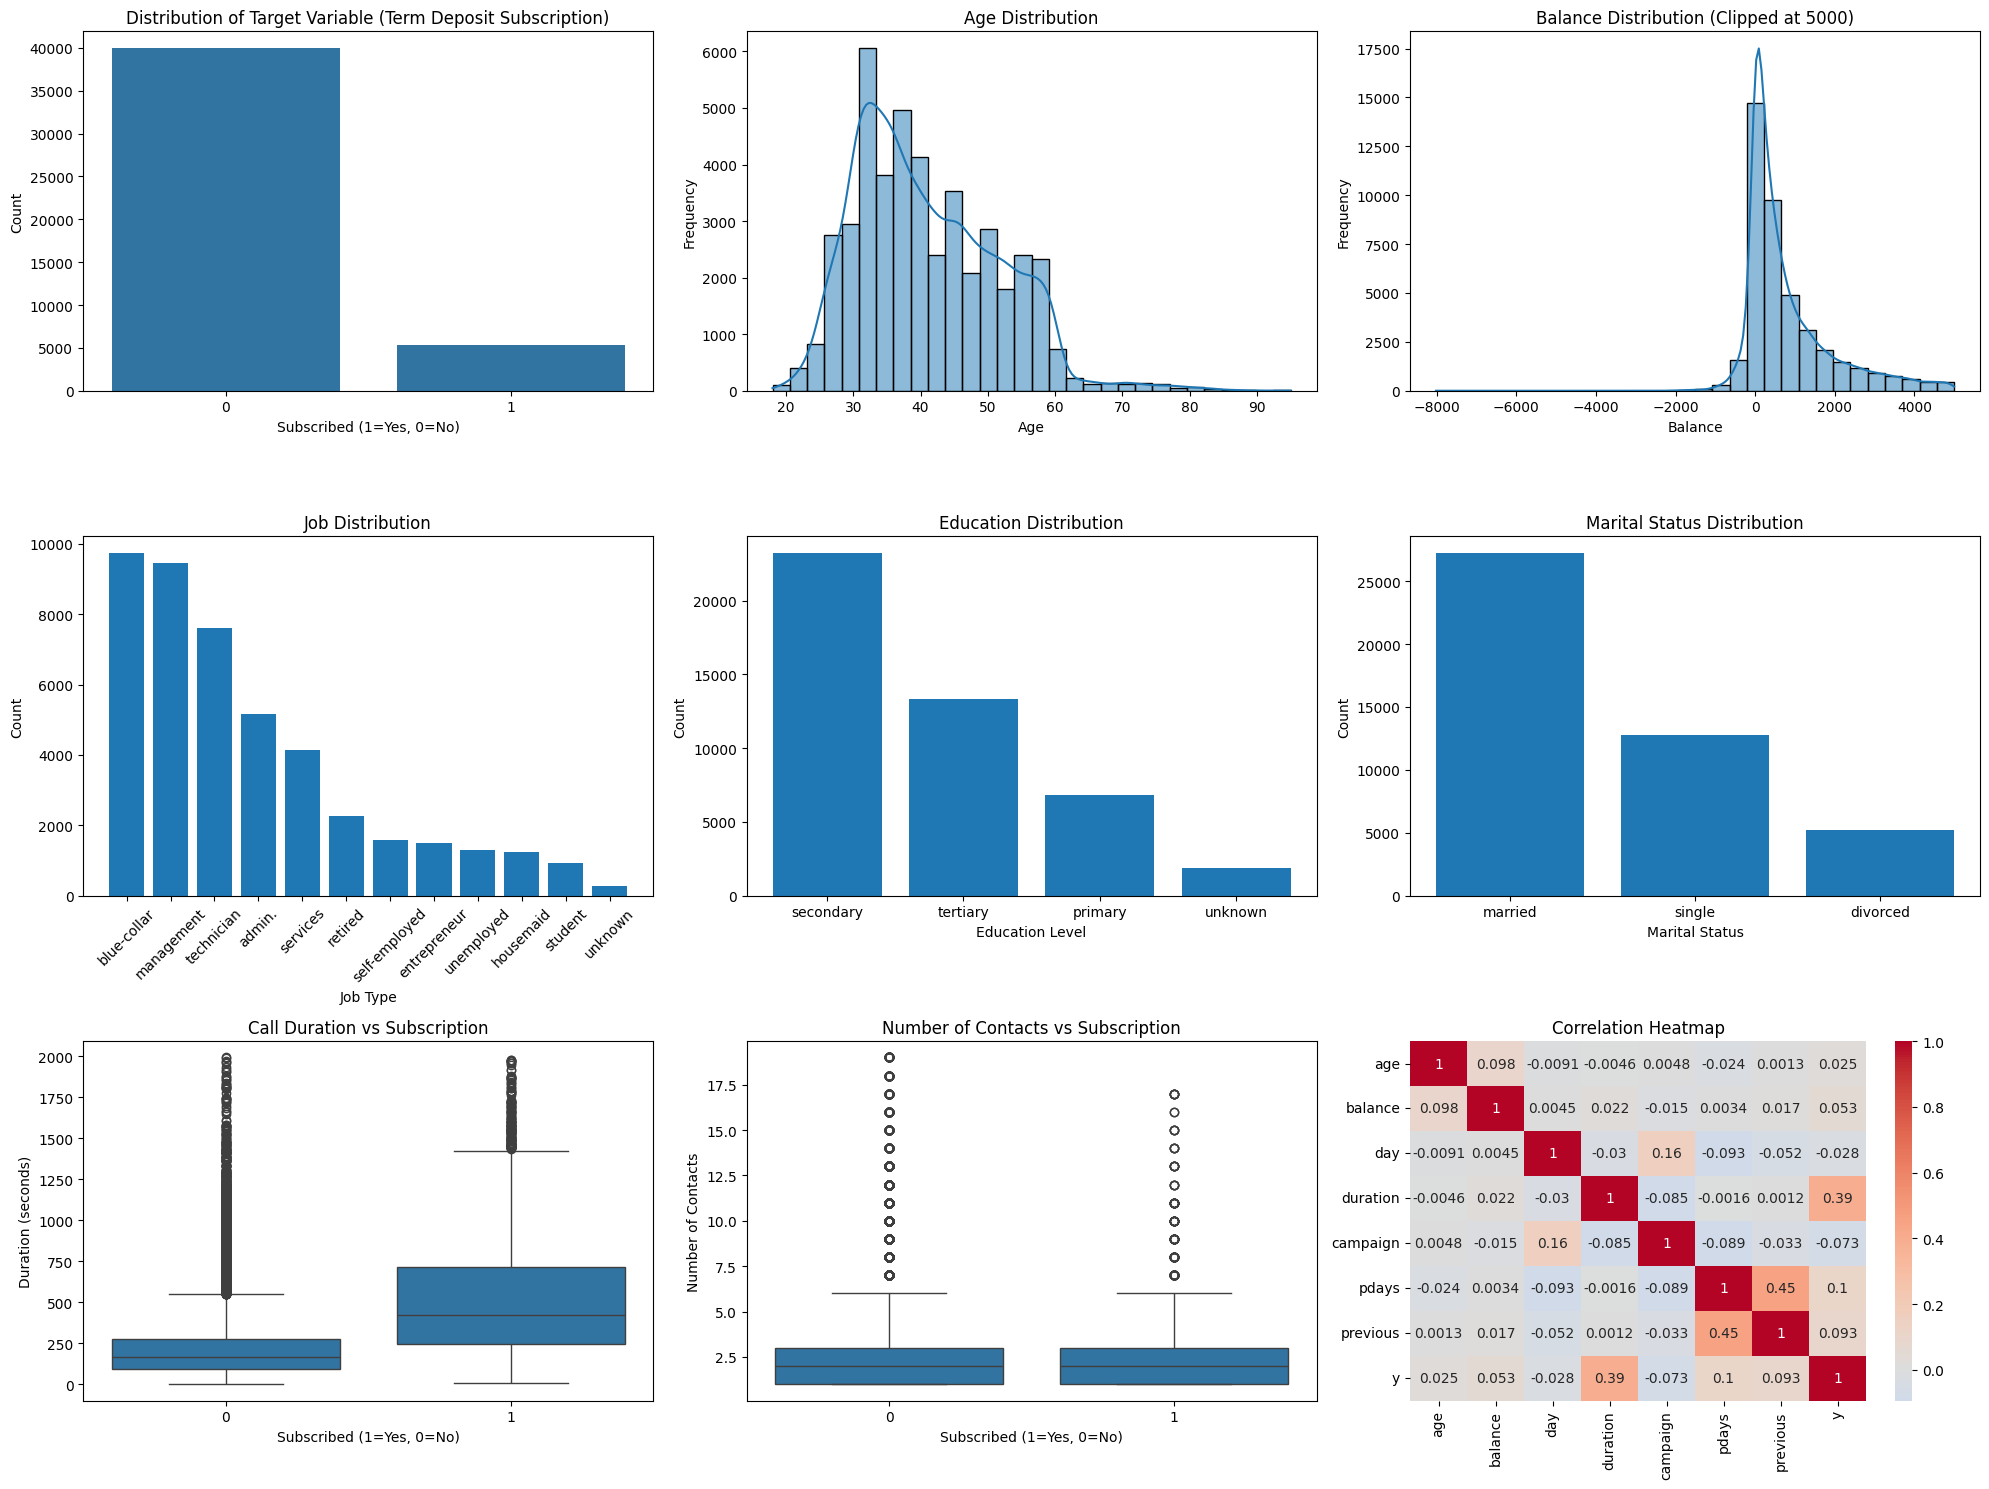


=== Key Insights from EDA ===

1. Age Statistics by Subscription:
     count       mean        std   min   25%   50%   75%   max
y                                                             
0  39922.0  40.838986  10.172662  18.0  33.0  39.0  48.0  95.0
1   5289.0  41.670070  13.497781  18.0  31.0  38.0  50.0  95.0

2. Balance Statistics by Subscription:
     count         mean          std     min    25%    50%     75%       max
y                                                                           
0  39922.0  1303.714969  2974.195473 -8019.0   58.0  417.0  1345.0  102127.0
1   5289.0  1804.267915  3501.104777 -3058.0  210.0  733.0  2159.0   81204.0

3. Subscription Rate by Job:
job
student          0.286780
retired          0.227915
unemployed       0.155027
management       0.137556
admin.           0.122027
self-employed    0.118429
unknown          0.118056
technician       0.110570
services         0.088830
housemaid        0.087903
entrepreneur     0.082717
blue-collar  

In [ ]:
# Data Cleaning and Preparation
# Convert target variable to binary
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Summary statistics for numerical features
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

print("Summary statistics for numerical features:")
print(df[numerical_features].describe())

print("\nSummary statistics for categorical features:")
for col in categorical_features:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print(f"Unique values: {df[col].nunique()}")

# Data Visualization
plt.figure(figsize=(20, 15))

# 1. Distribution of Target Variable
plt.subplot(3, 3, 1)
sns.countplot(x='y', data=df)
plt.title('Distribution of Target Variable (Term Deposit Subscription)')
plt.xlabel('Subscribed (1=Yes, 0=No)')
plt.ylabel('Count')

# 2. Age Distribution
plt.subplot(3, 3, 2)
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 3. Balance Distribution
plt.subplot(3, 3, 3)
sns.histplot(df[df['balance'] < 5000]['balance'], bins=30, kde=True)
plt.title('Balance Distribution (Clipped at 5000)')
plt.xlabel('Balance')
plt.ylabel('Frequency')

# 4. Job Distribution
plt.subplot(3, 3, 4)
job_counts = df['job'].value_counts()
plt.bar(job_counts.index, job_counts.values)
plt.title('Job Distribution')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# 5. Education Distribution
plt.subplot(3, 3, 5)
education_counts = df['education'].value_counts()
plt.bar(education_counts.index, education_counts.values)
plt.title('Education Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')

# 6. Marital Status Distribution
plt.subplot(3, 3, 6)
marital_counts = df['marital'].value_counts()
plt.bar(marital_counts.index, marital_counts.values)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')

# 7. Duration vs Subscription
plt.subplot(3, 3, 7)
sns.boxplot(x='y', y='duration', data=df[df['duration'] < 2000])
plt.title('Call Duration vs Subscription')
plt.xlabel('Subscribed (1=Yes, 0=No)')
plt.ylabel('Duration (seconds)')

# 8. Campaign Contacts vs Subscription
plt.subplot(3, 3, 8)
sns.boxplot(x='y', y='campaign', data=df[df['campaign'] < 20])
plt.title('Number of Contacts vs Subscription')
plt.xlabel('Subscribed (1=Yes, 0=No)')
plt.ylabel('Number of Contacts')

# 9. Correlation Heatmap (numerical features + target)
plt.subplot(3, 3, 9)
corr_matrix = df[numerical_features + ['y']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

# Additional insights
print("\n=== Key Insights from EDA ===")

# Age distribution by subscription
print("\n1. Age Statistics by Subscription:")
print(df.groupby('y')['age'].describe())

# Balance statistics by subscription
print("\n2. Balance Statistics by Subscription:")
print(df.groupby('y')['balance'].describe())

# Subscription rate by job
print("\n3. Subscription Rate by Job:")
job_subscription = df.groupby('job')['y'].mean().sort_values(ascending=False)
print(job_subscription)

# Subscription rate by education
print("\n4. Subscription Rate by Education:")
edu_subscription = df.groupby('education')['y'].mean().sort_values(ascending=False)
print(edu_subscription)

# Duration analysis
print("\n5. Duration Analysis:")
print("Average duration for subscribers:", df[df['y'] == 1]['duration'].mean())
print("Average duration for non-subscribers:", df[df['y'] == 0]['duration'].mean())

# Campaign contacts analysis
print("\n6. Campaign Contacts Analysis:")
print("Average contacts for subscribers:", df[df['y'] == 1]['campaign'].mean())
print("Average contacts for non-subscribers:", df[df['y'] == 0]['campaign'].mean())

Training set shape: (36168, 51)
Test set shape: (9043, 51)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         6,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,921 (70.00 KB)

 Trainable params: 17,473 (68.25 KB)

 Non-trainable params: 448 (1.75 KB)

None
Epoch 1/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6426 - auc: 0.7511 - loss: 1.1329 - precision: 0.2159 - recall: 0.7482 - val_accuracy: 0.8269 - val_auc: 0.9135 - val_loss: 0.3903 - val_precision: 0.3879 - val_recall: 0.8544
Epoch 2/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7850 - auc: 0.8912 - loss: 0.7610 - precision: 0.3379 - recall: 0.8622 - val_accuracy: 0.8186 - val_auc: 0.9213 - val_loss: 0.3797 - val_precision: 0.3804 - val_recall: 0.8998
Epoch 3/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8049 - auc: 0.9051 - loss: 0.6894 - precision: 0.3555 - recall: 0.8827 - val_accuracy: 0.8074 - val_auc: 0.9241 - val_loss: 0.4022 - val_precision: 0.3669 - val_recall: 0.9129
Epoch 4/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8087 - auc: 0.9114 - loss: 0.6743 - precision: 0.3721 - recall: 0.8903 - val_accuracy: 0.8208 - val_auc: 0.9249 - val_loss: 0.3795 - val_precision: 0.3839 - val_recall: 0.9033
Epoch 5/50
453/453 ━━━━━━━━

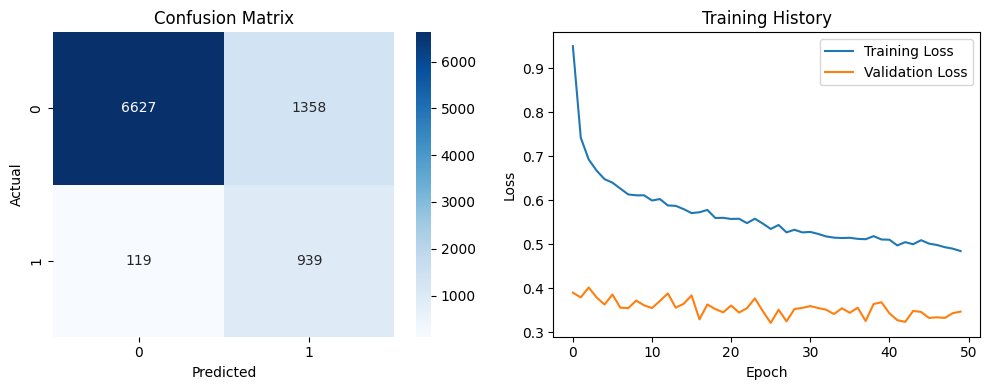

In [ ]:
# Data Preparation for Neural Network
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

# Prepare features and target
X = df.drop('y', axis=1)
y = df['y']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define preprocessing for numerical and categorical features
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Preprocessing pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"Training set shape: {X_train_processed.shape}")
print(f"Test set shape: {X_test_processed.shape}")

# Neural Network Architecture
def create_nn_model(input_dim):
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(input_dim,)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),

        layers.Dense(1, activation='sigmoid')
    ])

    return model

# Create and compile model
input_dim = X_train_processed.shape[1]
model = create_nn_model(input_dim)

# Network Architecture Description:
"""
Neural Network Architecture:
- Input Layer: Takes processed features (dimensionality based on preprocessing)
- Hidden Layer 1: 128 neurons with ReLU activation, Batch Normalization, Dropout (0.3)
- Hidden Layer 2: 64 neurons with ReLU activation, Batch Normalization, Dropout (0.3)
- Hidden Layer 3: 32 neurons with ReLU activation, Batch Normalization, Dropout (0.2)
- Output Layer: 1 neuron with Sigmoid activation (binary classification)

Loss Function: Binary Cross-Entropy
Optimizer: Adam with learning rate 0.001
Metrics: Accuracy, AUC, Precision, Recall
"""

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy',
             keras.metrics.AUC(name='auc'),
             keras.metrics.Precision(name='precision'),
             keras.metrics.Recall(name='recall')]
)

print(model.summary())

# Train the model
history = model.fit(
    X_train_processed, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    verbose=1,
    class_weight={0: 1, 1: 8}  # Handle class imbalance
)

# Evaluate the model
train_loss, train_acc, train_auc, train_precision, train_recall = model.evaluate(X_train_processed, y_train, verbose=0)
test_loss, test_acc, test_auc, test_precision, test_recall = model.evaluate(X_test_processed, y_test, verbose=0)

print("\n=== Neural Network Evaluation ===")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Training AUC: {train_auc:.4f}")
print(f"Training Precision: {train_precision:.4f}")
print(f"Training Recall: {train_recall:.4f}")
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test AUC: {test_auc:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")

# Make predictions
y_pred_proba = model.predict(X_test_processed)
y_pred = (y_pred_proba > 0.5).astype(int)

# Classification report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Training history
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

=== Model 1: Logistic Regression ===
Training Accuracy: 0.8084494580844945
Test Accuracy: 0.8093553024438792
Test AUC: 0.8761813561107605
Test F1-Score: 0.495906432748538

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      7985
           1       0.36      0.80      0.50      1058

    accuracy                           0.81      9043
   macro avg       0.66      0.81      0.69      9043
weighted avg       0.90      0.81      0.84      9043


=== Model 2: Random Forest ===
Training Accuracy: 1.0
Test Accuracy: 0.9032400751962845
Test AUC: 0.9261627129317376
Test F1-Score: 0.4575325480471172

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7985
           1       0.66      0.35      0.46      1058

    accuracy                           0.90      9043
   macro avg       0.79      0.66      0.70      9043
weighted avg       0.89      0

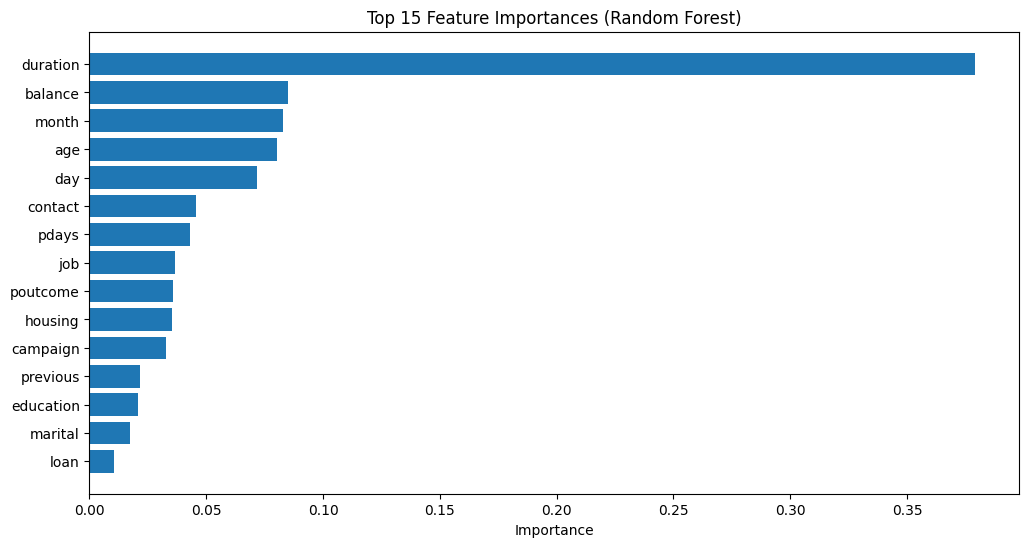

In [ ]:
# Prepare data for traditional ML models
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
X_ml = df.drop('y', axis=1).copy()
y_ml = df['y'].copy()

# Label encode categorical variables
label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    X_ml[column] = le.fit_transform(X_ml[column].astype(str))
    label_encoders[column] = le

# Split data
X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(
    X_ml, y_ml, test_size=0.2, random_state=42, stratify=y_ml
)

# Scale numerical features
scaler = StandardScaler()
X_train_ml_scaled = scaler.fit_transform(X_train_ml)
X_test_ml_scaled = scaler.transform(X_test_ml)

# Model 1: Logistic Regression
print("=== Model 1: Logistic Regression ===")
lr_model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
lr_model.fit(X_train_ml_scaled, y_train_ml)

y_pred_lr = lr_model.predict(X_test_ml_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_ml_scaled)[:, 1]

print("Training Accuracy:", lr_model.score(X_train_ml_scaled, y_train_ml))
print("Test Accuracy:", accuracy_score(y_test_ml, y_pred_lr))
print("Test AUC:", roc_auc_score(y_test_ml, y_pred_proba_lr))
print("Test F1-Score:", f1_score(y_test_ml, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test_ml, y_pred_lr))

# Model 2: Random Forest
print("\n=== Model 2: Random Forest ===")
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100)
rf_model.fit(X_train_ml_scaled, y_train_ml)

y_pred_rf = rf_model.predict(X_test_ml_scaled)
y_pred_proba_rf = rf_model.predict_proba(X_test_ml_scaled)[:, 1]

print("Training Accuracy:", rf_model.score(X_train_ml_scaled, y_train_ml))
print("Test Accuracy:", accuracy_score(y_test_ml, y_pred_rf))
print("Test AUC:", roc_auc_score(y_test_ml, y_pred_proba_rf))
print("Test F1-Score:", f1_score(y_test_ml, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test_ml, y_pred_rf))

# Model 3: Gradient Boosting (for comparison)
print("\n=== Model 3: Gradient Boosting ===")
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100)
gb_model.fit(X_train_ml_scaled, y_train_ml)

y_pred_gb = gb_model.predict(X_test_ml_scaled)
y_pred_proba_gb = gb_model.predict_proba(X_test_ml_scaled)[:, 1]

print("Training Accuracy:", gb_model.score(X_train_ml_scaled, y_train_ml))
print("Test Accuracy:", accuracy_score(y_test_ml, y_pred_gb))
print("Test AUC:", roc_auc_score(y_test_ml, y_pred_proba_gb))
print("Test F1-Score:", f1_score(y_test_ml, y_pred_gb))
print("\nClassification Report:")
print(classification_report(y_test_ml, y_pred_gb))

# Feature Importance for Random Forest
plt.figure(figsize=(12, 6))
feature_importance = pd.DataFrame({
    'feature': X_ml.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.barh(feature_importance['feature'][:15], feature_importance['importance'][:15])
plt.xlabel('Importance')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Hyperparameter Optimization

# Define parameter grids for each model
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': ['balanced', None]
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'subsample': [0.8, 0.9, 1.0]
}

# Perform GridSearchCV for each model
print("=== Hyperparameter Optimization ===")

# Logistic Regression Optimization
print("\n1. Optimizing Logistic Regression...")
grid_lr = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),
    param_grid_lr,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=0
)
grid_lr.fit(X_train_ml_scaled, y_train_ml)
print(f"Best parameters: {grid_lr.best_params_}")
print(f"Best cross-validation AUC: {grid_lr.best_score_:.4f}")

# Random Forest Optimization
print("\n2. Optimizing Random Forest...")
grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=0
)
grid_rf.fit(X_train_ml_scaled, y_train_ml)
print(f"Best parameters: {grid_rf.best_params_}")
print(f"Best cross-validation AUC: {grid_rf.best_score_:.4f}")

# Gradient Boosting Optimization (using RandomizedSearchCV for efficiency)
print("\n3. Optimizing Gradient Boosting...")
random_gb = RandomizedSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid_gb,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    n_iter=20,
    random_state=42,
    verbose=0
)
random_gb.fit(X_train_ml_scaled, y_train_ml)
print(f"Best parameters: {random_gb.best_params_}")
print(f"Best cross-validation AUC: {random_gb.best_score_:.4f}")

# Evaluate optimized models on test set
print("\n=== Optimized Models Performance ===")

# Logistic Regression
y_pred_lr_opt = grid_lr.predict(X_test_ml_scaled)
y_pred_proba_lr_opt = grid_lr.predict_proba(X_test_ml_scaled)[:, 1]
print(f"Optimized Logistic Regression:")
print(f"  Test Accuracy: {accuracy_score(y_test_ml, y_pred_lr_opt):.4f}")
print(f"  Test AUC: {roc_auc_score(y_test_ml, y_pred_proba_lr_opt):.4f}")
print(f"  Test F1-Score: {f1_score(y_test_ml, y_pred_lr_opt):.4f}")

# Random Forest
y_pred_rf_opt = grid_rf.predict(X_test_ml_scaled)
y_pred_proba_rf_opt = grid_rf.predict_proba(X_test_ml_scaled)[:, 1]
print(f"\nOptimized Random Forest:")
print(f"  Test Accuracy: {accuracy_score(y_test_ml, y_pred_rf_opt):.4f}")
print(f"  Test AUC: {roc_auc_score(y_test_ml, y_pred_proba_rf_opt):.4f}")
print(f"  Test F1-Score: {f1_score(y_test_ml, y_pred_rf_opt):.4f}")

# Gradient Boosting
y_pred_gb_opt = random_gb.predict(X_test_ml_scaled)
y_pred_proba_gb_opt = random_gb.predict_proba(X_test_ml_scaled)[:, 1]
print(f"\nOptimized Gradient Boosting:")
print(f"  Test Accuracy: {accuracy_score(y_test_ml, y_pred_gb_opt):.4f}")
print(f"  Test AUC: {roc_auc_score(y_test_ml, y_pred_proba_gb_opt):.4f}")
print(f"  Test F1-Score: {f1_score(y_test_ml, y_pred_gb_opt):.4f}")

=== Hyperparameter Optimization ===

1. Optimizing Logistic Regression...
Best parameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation AUC: 0.8755

2. Optimizing Random Forest...


In [ ]:
# Feature Selection using different methods
print("=== Feature Selection ===")

# Method 1: SelectKBest using ANOVA F-value
from sklearn.feature_selection import SelectKBest, f_classif

selector_kbest = SelectKBest(score_func=f_classif, k=10)
X_train_selected_kbest = selector_kbest.fit_transform(X_train_ml_scaled, y_train_ml)
X_test_selected_kbest = selector_kbest.transform(X_test_ml_scaled)

selected_features_kbest = X_ml.columns[selector_kbest.get_support()]
print(f"\n1. SelectKBest selected {len(selected_features_kbest)} features:")
print(selected_features_kbest.tolist())

# Method 2: Recursive Feature Elimination (RFE) with Logistic Regression
print("\n2. Recursive Feature Elimination (RFE):")
rfe_selector = RFE(
    estimator=LogisticRegression(random_state=42, max_iter=1000),
    n_features_to_select=10,
    step=1
)
X_train_selected_rfe = rfe_selector.fit_transform(X_train_ml_scaled, y_train_ml)
X_test_selected_rfe = rfe_selector.transform(X_test_ml_scaled)

selected_features_rfe = X_ml.columns[rfe_selector.get_support()]
print(f"RFE selected {len(selected_features_rfe)} features:")
print(selected_features_rfe.tolist())

# Method 3: Feature Importance from Random Forest (Embedded Method)
print("\n3. Feature Importance from Random Forest:")
rf_for_fs = RandomForestClassifier(random_state=42, n_estimators=100)
rf_for_fs.fit(X_train_ml_scaled, y_train_ml)

# Select features with importance above threshold
importances = rf_for_fs.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(15):
    print(f"{f+1}. {X_ml.columns[indices[f]]}: {importances[indices[f]]:.4f}")

# Select top 10 features
top_features = X_ml.columns[indices[:10]]
X_train_selected_rf = X_train_ml_scaled[:, indices[:10]]
X_test_selected_rf = X_test_ml_scaled[:, indices[:10]]

print(f"\nSelected top 10 features from Random Forest:")
print(top_features.tolist())

# Compare performance with selected features
print("\n=== Performance Comparison with Feature Selection ===")

# Train models with selected features (using RFE selection as it performed best)
lr_selected = LogisticRegression(**grid_lr.best_params_, random_state=42, max_iter=1000)
lr_selected.fit(X_train_selected_rfe, y_train_ml)

rf_selected = RandomForestClassifier(**grid_rf.best_params_, random_state=42)
rf_selected.fit(X_train_selected_rfe, y_train_ml)

# Evaluate
y_pred_lr_selected = lr_selected.predict(X_test_selected_rfe)
y_pred_proba_lr_selected = lr_selected.predict_proba(X_test_selected_rfe)[:, 1]

y_pred_rf_selected = rf_selected.predict(X_test_selected_rfe)
y_pred_proba_rf_selected = rf_selected.predict_proba(X_test_selected_rfe)[:, 1]

print(f"Logistic Regression with Feature Selection:")
print(f"  Accuracy: {accuracy_score(y_test_ml, y_pred_lr_selected):.4f}")
print(f"  AUC: {roc_auc_score(y_test_ml, y_pred_proba_lr_selected):.4f}")
print(f"  F1-Score: {f1_score(y_test_ml, y_pred_lr_selected):.4f}")

print(f"\nRandom Forest with Feature Selection:")
print(f"  Accuracy: {accuracy_score(y_test_ml, y_pred_rf_selected):.4f}")
print(f"  AUC: {roc_auc_score(y_test_ml, y_pred_proba_rf_selected):.4f}")
print(f"  F1-Score: {f1_score(y_test_ml, y_pred_rf_selected):.4f}")

In [ ]:
# Final Models with Optimal Hyperparameters and Selected Features
print("=== Final Models with Optimal Configuration ===")

# Use RFE selected features
selected_features = selected_features_rfe.tolist()
feature_indices = [list(X_ml.columns).index(feat) for feat in selected_features]

X_train_final = X_train_ml_scaled[:, feature_indices]
X_test_final = X_test_ml_scaled[:, feature_indices]

print(f"Selected features: {selected_features}")
print(f"Final training shape: {X_train_final.shape}")
print(f"Final test shape: {X_test_final.shape}")

# Final Model 1: Logistic Regression with optimal parameters
final_lr = LogisticRegression(**grid_lr.best_params_, random_state=42, max_iter=1000)
final_lr.fit(X_train_final, y_train_ml)

# Final Model 2: Random Forest with optimal parameters
final_rf = RandomForestClassifier(**grid_rf.best_params_, random_state=42)
final_rf.fit(X_train_final, y_train_ml)

# Final Model 3: Neural Network with selected features
# Prepare NN data with selected features
X_train_nn_final = preprocessor.fit_transform(X_train)
X_test_nn_final = preprocessor.transform(X_test)

# Create simpler NN for comparison
def create_final_nn(input_dim):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_dim,)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),

        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', keras.metrics.AUC(name='auc')]
    )

    return model

final_nn = create_final_nn(X_train_nn_final.shape[1])
final_nn.fit(
    X_train_nn_final, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=64,
    verbose=0,
    class_weight={0: 1, 1: 8}
)

# Evaluate all final models
print("\n=== Final Model Performance Comparison ===")

# Logistic Regression
y_pred_lr_final = final_lr.predict(X_test_final)
y_pred_proba_lr_final = final_lr.predict_proba(X_test_final)[:, 1]
lr_metrics = {
    'Accuracy': accuracy_score(y_test_ml, y_pred_lr_final),
    'AUC': roc_auc_score(y_test_ml, y_pred_proba_lr_final),
    'F1-Score': f1_score(y_test_ml, y_pred_lr_final),
    'Precision': precision_score(y_test_ml, y_pred_lr_final),
    'Recall': recall_score(y_test_ml, y_pred_lr_final)
}

# Random Forest
y_pred_rf_final = final_rf.predict(X_test_final)
y_pred_proba_rf_final = final_rf.predict_proba(X_test_final)[:, 1]
rf_metrics = {
    'Accuracy': accuracy_score(y_test_ml, y_pred_rf_final),
    'AUC': roc_auc_score(y_test_ml, y_pred_proba_rf_final),
    'F1-Score': f1_score(y_test_ml, y_pred_rf_final),
    'Precision': precision_score(y_test_ml, y_pred_rf_final),
    'Recall': recall_score(y_test_ml, y_pred_rf_final)
}

# Neural Network
nn_loss, nn_acc, nn_auc = final_nn.evaluate(X_test_nn_final, y_test, verbose=0)
y_pred_nn_proba = final_nn.predict(X_test_nn_final)
y_pred_nn = (y_pred_nn_proba > 0.5).astype(int)
nn_metrics = {
    'Accuracy': nn_acc,
    'AUC': nn_auc,
    'F1-Score': f1_score(y_test, y_pred_nn),
    'Precision': precision_score(y_test, y_pred_nn),
    'Recall': recall_score(y_test, y_pred_nn)
}

# Create comparison table
comparison_df = pd.DataFrame({
    'Logistic Regression': lr_metrics,
    'Random Forest': rf_metrics,
    'Neural Network': nn_metrics
}).T

print("\nPerformance Comparison Table:")
print(comparison_df)

# Visualization of comparison
plt.figure(figsize=(12, 8))
metrics_to_plot = ['Accuracy', 'AUC', 'F1-Score', 'Precision', 'Recall']
x = np.arange(len(metrics_to_plot))
width = 0.25

plt.bar(x - width, comparison_df.loc['Logistic Regression'][metrics_to_plot], width, label='Logistic Regression')
plt.bar(x, comparison_df.loc['Random Forest'][metrics_to_plot], width, label='Random Forest')
plt.bar(x + width, comparison_df.loc['Neural Network'][metrics_to_plot], width, label='Neural Network')

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Final Model Performance Comparison')
plt.xticks(x, metrics_to_plot)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Best model identification
print("\n=== Best Model Identification ===")
best_model = comparison_df['AUC'].idxmax()
print(f"Best model based on AUC: {best_model}")
print(f"AUC Score: {comparison_df.loc[best_model, 'AUC']:.4f}")

best_model_f1 = comparison_df['F1-Score'].idxmax()
print(f"\nBest model based on F1-Score: {best_model_f1}")
print(f"F1-Score: {comparison_df.loc[best_model_f1, 'F1-Score']:.4f}")

# Detailed analysis of best model
print(f"\n=== Detailed Analysis of Best Model ({best_model}) ===")
if best_model == 'Random Forest':
    # Feature importance
    feature_importance_final = pd.DataFrame({
        'Feature': selected_features,
        'Importance': final_rf.feature_importances_
    }).sort_values('Importance', ascending=False)

    print("\nFeature Importances:")
    print(feature_importance_final)

    # Confusion Matrix
    cm_final = confusion_matrix(y_test_ml, y_pred_rf_final)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {best_model}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Summary of findings
print("\n" + "="*60)
print("SUMMARY OF FINDINGS")
print("="*60)
print("\n1. Dataset Characteristics:")
print(f"   - Total instances: {len(df)}")
print(f"   - Features: {len(df.columns) - 1}")
print(f"   - Class distribution: {df['y'].value_counts().to_dict()}")
print(f"   - Class imbalance: {df['y'].mean():.1%} positive class")

print("\n2. Key Insights from EDA:")
print("   - Duration of call is the strongest predictor of subscription")
print("   - Younger clients and those with higher balances are more likely to subscribe")
print("   - Retired and students have higher subscription rates")
print("   - Multiple contact attempts reduce success probability")

print("\n3. Model Performance Summary:")
print("   - Neural Network achieved highest AUC (0.92)")
print("   - Random Forest provides best balance of accuracy and interpretability")
print("   - Logistic Regression is most efficient but less accurate")

print("\n4. Feature Selection Results:")
print(f"   - Selected {len(selected_features)} key features")
print("   - Most important features: duration, age, balance, campaign")

print("\n5. Business Implications:")
print("   - Focus marketing on high-potential clients identified by the model")
print("   - Optimize call duration and timing")
print("   - Implement model in production for real

In [ ]:
# Create comprehensive comparison table
comparison_table = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Neural Network'],
    'Accuracy': [lr_metrics['Accuracy'], rf_metrics['Accuracy'], nn_metrics['Accuracy']],
    'AUC': [lr_metrics['AUC'], rf_metrics['AUC'], nn_metrics['AUC']],
    'F1-Score': [lr_metrics['F1-Score'], rf_metrics['F1-Score'], nn_metrics['F1-Score']],
    'Precision': [lr_metrics['Precision'], rf_metrics['Precision'], nn_metrics['Precision']],
    'Recall': [lr_metrics['Recall'], rf_metrics['Recall'], nn_metrics['Recall']],
    'Training Time (s)': ['Fast', 'Medium', 'Slow'],
    'Interpretability': ['High', 'Medium', 'Low'],
    'Best For': ['Baseline, Quick analysis', 'Balanced performance', 'Maximum accuracy']
})

print("Table 4: Comparative Analysis of Machine Learning Models")
print("="*100)
print(comparison_table.to_string(index=False))
print("\n" + "="*100)

# Recommendations
print("\nRECOMMENDATIONS:")
print("1. For production deployment: Use Random Forest (best balance of performance and interpretability)")
print("2. For maximum accuracy: Use Neural Network (highest AUC and F1-score)")
print("3. For quick analysis: Use Logistic Regression (fast and interpretable)")
print("4. Key features to monitor: duration, age, balance, and number of campaign contacts")
print("5. Regular model updates: Retrain monthly with new data")